In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("News.csv")
df.head(5)

,Unnamed: 0,title,text,subject,date,class
0,0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0.0
1,1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0.0
2,2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0.0
3,3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0.0
4,4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0.0


Data Cleaning 
Checking for null values

In [8]:
df.isnull().sum()

Unnamed: 0    21
title         21
text          21
subject       21
date          42
class         42
dtype: int64

In [9]:
df.shape

(44940, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  44919 non-null  float64
 1   title       44919 non-null  object 
 2   text        44919 non-null  object 
 3   subject     44919 non-null  object 
 4   date        44898 non-null  object 
 5   class       44898 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


Dropping the not useful columns:subject,title,unnamed column,date
we can just use text to predict

In [11]:
df=df.drop(['Unnamed: 0','title','subject','date'],axis=1)
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0.0
1,House Intelligence Committee Chairman Devin Nu...,0.0
2,"On Friday, it was revealed that former Milwauk...",0.0
3,"On Christmas day, Donald Trump announced that ...",0.0
4,Pope Francis used his annual Christmas Day mes...,0.0
...,...,...
44935,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1.0
44936,"LONDON (Reuters) - LexisNexis, a provider of l...",1.0
44937,MINSK (Reuters) - In the shadow of disused Sov...,1.0
44938,MOSCOW (Reuters) - Vatican Secretary of State ...,1.0


In [12]:
df['class'].value_counts()

class
0.0    23481
1.0    21417
Name: count, dtype: int64

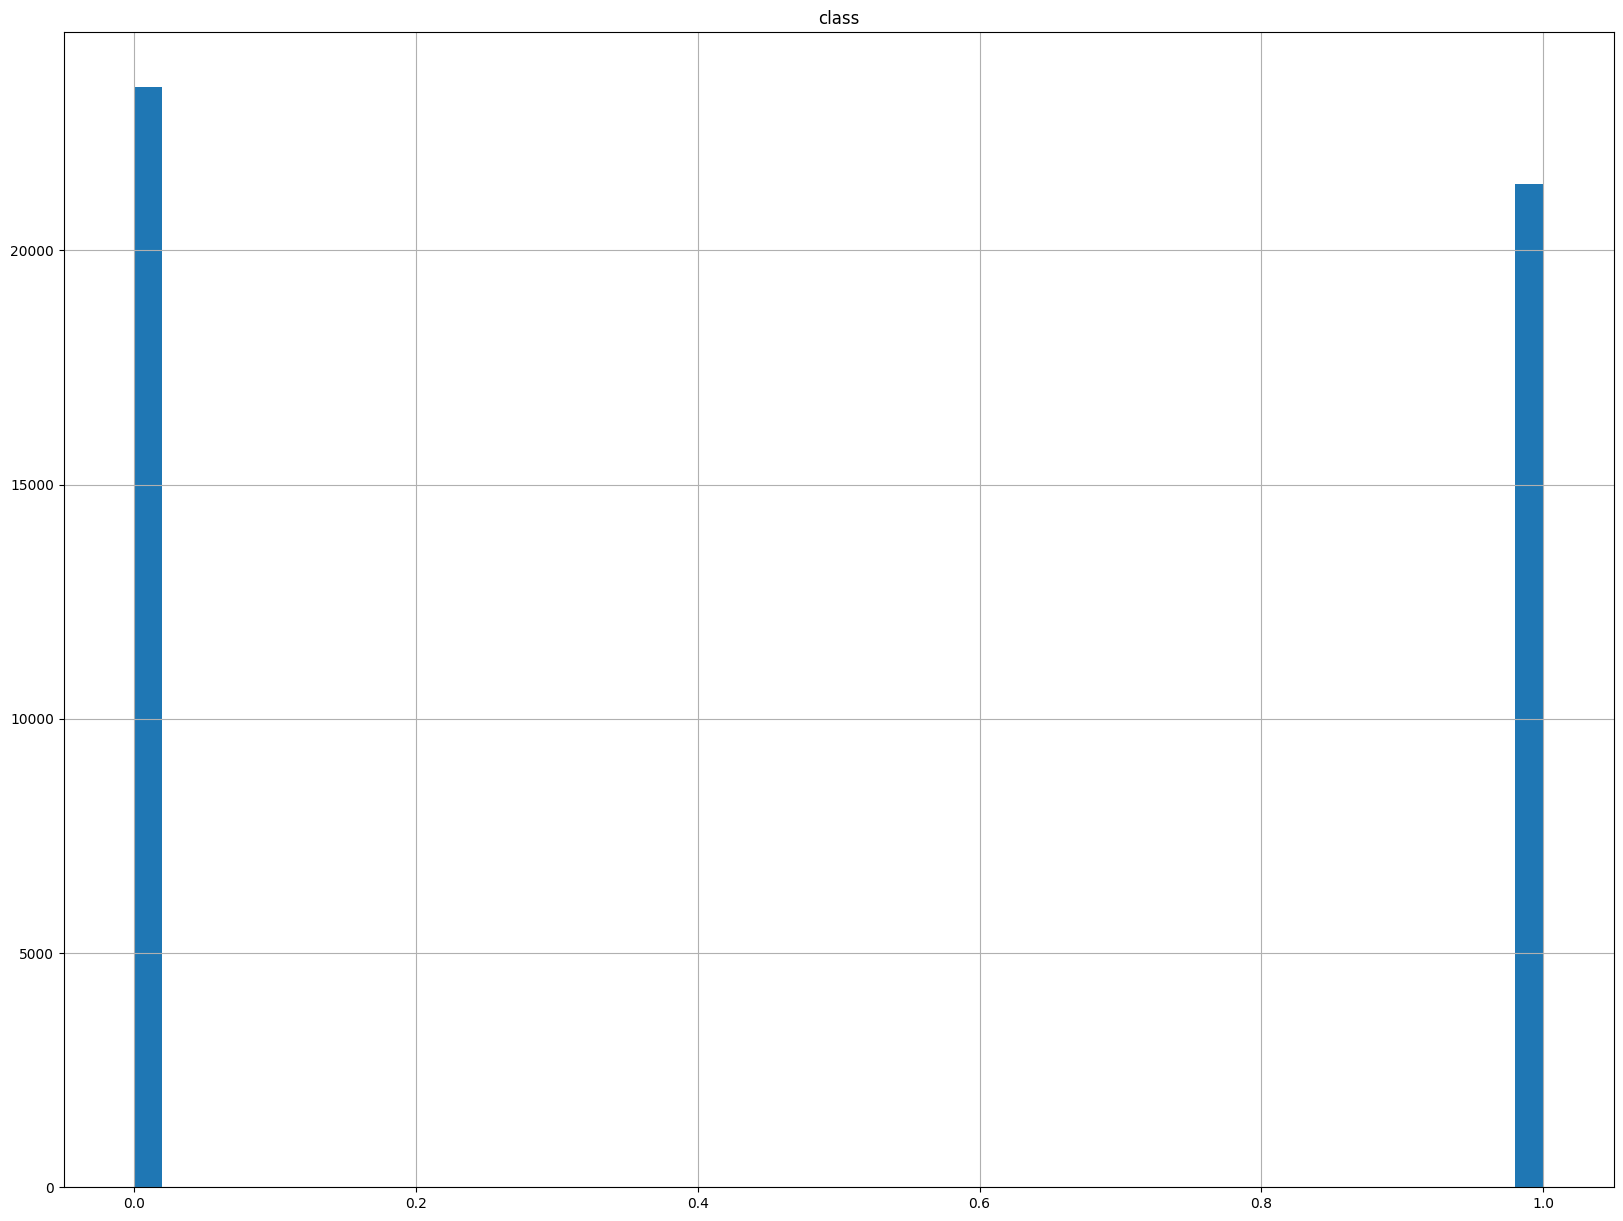

In [13]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
percentage=df['class'].value_counts()*100

<function matplotlib.pyplot.show(close=None, block=None)>

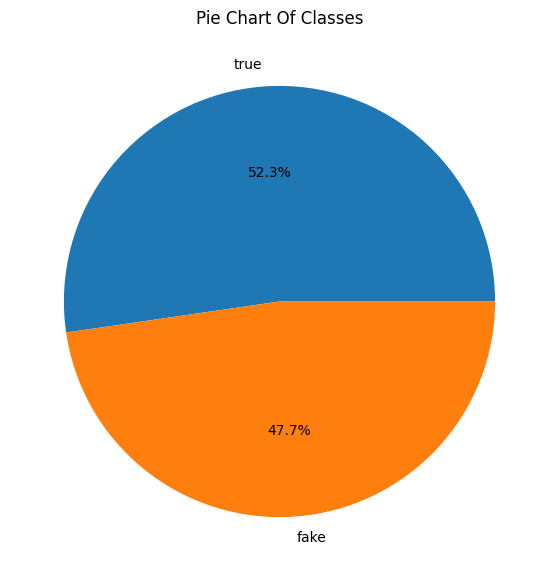

In [15]:
classlabels=['true','fake']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.title("Pie Chart Of Classes")
plt.show

In [16]:
df.columns

Index(['text', 'class'], dtype='object')

In [17]:
df.isnull().sum()

text     21
class    42
dtype: int64

Preprocessing and analysis of the text column

* we have to remove the punctuations,special characters and the stopwords

* this is done using the nltk library

In [21]:
df=df.dropna().reset_index(drop=True)

In [22]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [23]:
import re
from tqdm import tqdm 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kalespo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalespo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming:
stemming is process of reducing the word ot its base format.this process helps in improving the performance of text text analysis such as search,etxt mining
1.Stemmming:
it idaaly strips of the suffixes or prefixes ,the resulting term may not be valid word in the language.
* running --> run
* happily -->happi

Advantages:
simple and fast
reduces the size of vocualbory for text processing

disadvanatages:
can be too agrressive ,cuts of meaningful words


Lemmatization:
reducing the words to its base or dictionary form using ,this process takes into account the context and grammtixal role of the word.

advanatges:
* produces more accurate and meaningful base forms 

disadvanatges:
more computationally intensive
requires larger set of linguistic resources like dictioanry

In [24]:
def preprocess_text(text_data): 
	preprocessed_text = [] 
	
	for sentence in tqdm(text_data): 
		sentence = re.sub(r'[^\w\s]', '', sentence) 
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() 
								if token not in stopwords.words('english'))) 

	return preprocessed_text



In [25]:
preprocess_review=preprocess_text(df['text'])
df['text']=preprocess_review

 49%|████▉     | 22173/44898 [2:40:07<3:12:50,  1.96it/s] 

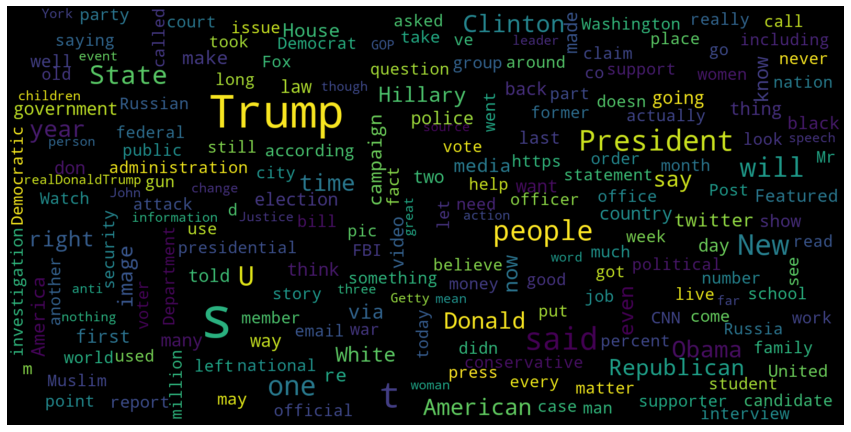

In [ ]:
consolidated=' '.join(
 word for word in df['text'][df['class']==0].astype(str))

wordcld=WordCloud(width=1600,
                  height=800,
                  random_state=21,
                  max_font_size=110,
                  collocations=False)
plt.figure(figsize=(15,10))
plt.imshow(wordcld.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

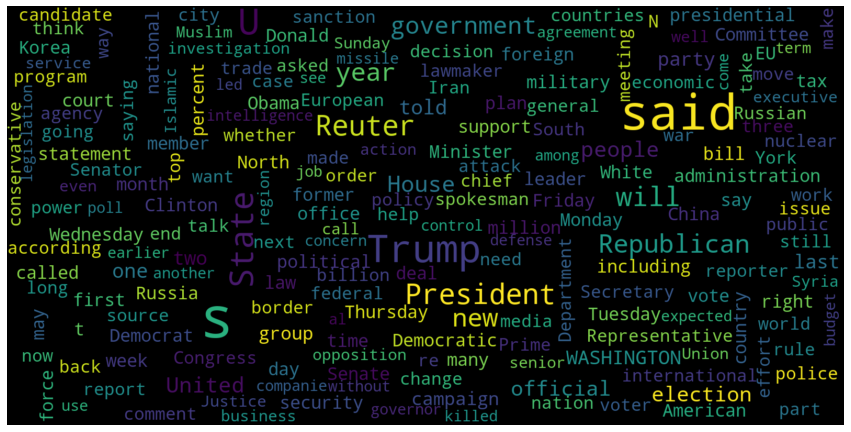

In [ ]:
consolidated=' '.join(
 word for word in df['text'][df['class']==1].astype(str))

wordcld=WordCloud(width=1600,
                  height=800,
                  random_state=21,
                  max_font_size=110,
                  collocations=False)
plt.figure(figsize=(15,10))
plt.imshow(wordcld.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Finding the most frequent words used

Natural Language Preprocessing:
1.Bag of Words:
is the conceptual framework for transforming text data into numerical form by counting word occurences ,disregarding the  grammar and order


2.Count Vectorizer:
is the practical tool that implements the bag of words model,providing the ready to use methods like tokenization,vcaulaborycreation and vetcorizatio with additinal preprocessing steps:

1.Tokeization:
text is split into individual words(token)

2.Vocabulary Creation:
list of all unique words in text dataset.add

3.Vector Representation:
each document is represented as the vector.each element of the vector corresponds to a word in the vocalbulary , and the value is the count representation of occurences of that word in the document 



for example:
documnets=["apple apple orange","banana apple"]
X=Vectorizer.fit_transform(documents)

output:
vocabulary : ['apple','banana','orange']
gets converted into sparse matrix (having more of zeros values) ,output will be [[2,0,1],[1,1,0]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus,n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])
                for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    return words_freq[:n]



### Function: `get_top_n_words`

This function takes a corpus (a collection of text documents) and an optional parameter `n`, and returns the top `n` most frequent words in the corpus.

1. **`vec = CountVectorizer().fit(corpus)`**:
   - `CountVectorizer` is a class from the `sklearn.feature_extraction.text` module that converts a collection of text documents to a matrix of token counts.
   - `.fit(corpus)` learns the vocabulary dictionary from the corpus. This step only fits the model on the data and does not transform it.

2. **`bag_of_words = vec.transform(corpus)`**:
   - `transform(corpus)` converts the text documents into a document-term matrix, where each row represents a document and each column represents a term (word) from the corpus vocabulary, with the value being the frequency of that term in the document.

3. **`sum_words = bag_of_words.sum(axis=0)`**:
   - `sum(axis=0)` sums the word counts for each term across all documents. This results in a matrix with one row, where each column represents the total count of a term in the entire corpus.

4. **`words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]`**:
   - This line creates a list of tuples. Each tuple contains a word and its corresponding frequency in the corpus.
   - `vec.vocabulary_.items()` provides a dictionary of terms (words) and their respective column indices in the document-term matrix.
   - For each word, the frequency is retrieved from `sum_words` using the column index.

5. **`words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)`**:
   - This sorts the list of tuples (`words_freq`) in descending order of word frequency (`x[1]`).

6. **`return words_freq[:n]`**:
   - This returns the top `n` most frequent words from the sorted list. If `n` is not provided, it returns the entire list of word frequencies.

### Usage: `common_words = get_top_n_words(data['text'], 20)`

- **`data['text']`**:
  - This assumes that `data` is a pandas DataFrame with a column named `'text'`, which contains the corpus (collection of text documents).

- **`get_top_n_words(data['text'], 20)`**:
  - This calls the `get_top_n_words` function with the corpus and requests the top 20 most frequent words.
  - The result is stored in the variable `common_words`, which will be a list of tuples, each containing a word and its frequency.

### Example Breakdown:

Suppose the corpus is:
```python
corpus = [
    "Data science is fun",
    "Machine learning is a part of data science",
    "Data science includes machine learning"
]
```

1. **CountVectorizer fitting**:
   - Vocabulary: `{'data': 0, 'science': 1, 'is': 2, 'fun': 3, 'machine': 4, 'learning': 5, 'a': 6, 'part': 7, 'of': 8, 'includes': 9}`

2. **Transforming**:
   - Document-term matrix (bag_of_words):
     ```
     [[1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      [1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
      [1, 1, 0, 0, 1, 1, 0, 0, 0, 1]]
     ```

3. **Summing words**:
   - Sum of words:
     ```
     [[3, 3, 2, 1, 2, 2, 1, 1, 1, 1]]
     ```

4. **Creating word-frequency tuples**:
   - `words_freq`:
     ```
     [('data', 3), ('science', 3), ('is', 2), ('fun', 1), ('machine', 2), ('learning', 2), ('a', 1), ('part', 1), ('of', 1), ('includes', 1)]
     ```

5. **Sorting**:
   - Sorted `words_freq`:
     ```
     [('data', 3), ('science', 3), ('is', 2), ('machine', 2), ('learning', 2), ('fun', 1), ('a', 1), ('part', 1), ('of', 1), ('includes', 1)]
     ```

6. **Returning top `n` words**:
   - If `n=20`, the function returns all the sorted word frequencies, as the corpus is small and does not contain more than 20 distinct words.


In [ ]:
df1=pd.dataFrame(common_words,columns=['Review','count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
kind='bar',
figsize=(10,6),
xlabel='Top words',
ylabel='count',
title='bar chart of top words frequency'


)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


X_train,X_test,y_train,y_test =train_test_split(df['text'],df['class'],test_size=0.25,random_state=42)


Converting text into Vectors using TF-IDF Vectorizer

TF-IDF : Term Frequency Inverse Document Frequency 

is a technique used iin text analysis to determine how important a word is within a document or sentence compared to collections of documents 

Term Frequency : calculates number of the times word is appearing within the sentence(document)
aaple is the good fruit.it is recommended by doctor .
here is -->2/10 (2 is ,out of 10 words)


Inverse Term Frequency :
this measures how important a word is by looking at how important a word is by looking at how common or rare it is across all documents.

if word appears in many documents ,idf value is lower ,indicating its a common word(is,the).If a word apears in only a few documents ,its IDF value is higher

TF-IDF Score:
These are multiplied for a word.this score tells us how imp is the word in all documnets.


for example:
docu1: the quick brown fox jumps over the lazy dog
docu2: the lazy cat sleeps on the couch
docu3: the quick brown dog chases the lazy fox

now if we calcuate score for fox:

docu1:
term frequency(tf): fox appears once in 8 words : 1/8
IDF : fox appears in 2 documents 
total number of documents : n = 3
number of documents contaningn fox (n)=2
IDF = log(N/n)=log(3/2)=0.176
score = 0.176*1/8=0.022

docu 2: 
tf=0
score=0

docu3:
tf=1/7
idf=0.176 same as previous
score=1/7*0.176=0.025

Differnce between Count Vectorizer and TFIDF :
1.frquency vs importance : count vectorizer only considers how often words appear ,while tf-idf adjusts this by considering how common or rare words across the documents

2.handling common words:
in countvectorizer: commn words : the,is might dominate 
tf-idf reduces weight of such common words,making it easier to identify unique and significant terms

3.use cases:
1.count vectorizer: where frequency plays major role
2.tf-idf : more complex tasks where the relevance and importance of terms need to be factored : used in search engines

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train=vectorization.fit_transform(X_train)
x_test=vectorization.transform(x_test)


Model training,evaluation and prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

print(accuracy_score(y_train,model.predict(x_train)))
print(accuracy_score(y_test,model.predict(x_test)))



Solving through Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_test,model.predict(x_test)))


Confusion Matric for Decision Tree Classifier can be implemented to evaluate the model

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,model.predict(X_test))

cm_display=metrics.ConfusionMatrixDisplay(confusion_matric=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

Decision tree is performig well when compared to logistic regression